Lo primero que haremos es importar las librerias necesarias para el trabajo:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

A continuación leemos los datos de entrenamiento y de prueba de MNIST y los ingresamos en frames para el procesamiento de los datos

In [2]:
mnist_train = pd.read_csv("MNIST_data/mnist_train.csv")
mnist_test = pd.read_csv("MNIST_data/mnist_test.csv")

Usamos el método head para ver la estructura de los datos, con sus etiquetas

In [3]:
mnist_train.head(3)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_test.head(3)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Podemos observar que la columna a categorizar es la primer columna que tiene por titulo "5" en el dataset de entramiento y "7" en el de prueba, el resto de columnas son los pixeles del dígito.

Ahora procedemos a dividir el dataset de entramiento y de prueba en datasets con los valores de los pixeles y otros con las categorias.

In [5]:
mnist_train_pixels = mnist_train.drop("5", axis=1) # pixeles del digito MNIST del dataset de entrenamiento
mnist_train_labels = mnist_train.iloc[:,0] # variable categorica del dataset de entrenamiento
mnist_test_pixels = mnist_test.drop("7", axis=1) # pixeles del digito MNIST del dataset de prueba
mnist_test_labels = mnist_test.iloc[:,0] # variable categorica del dataset de entrenamiento

procedemos a mirar el shape de los dataset de entrenamiento para darnos una idea de cuántos columnas y filas tiene cada uno y usamos el método head para ver como quedaron conformados los datasets

In [6]:
mnist_train_pixels.shape

(59999, 784)

In [7]:
mnist_train_pixels.head(2)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist_train_labels.shape

(59999,)

In [9]:
mnist_train_labels.head(3)

0    0
1    4
2    1
Name: 5, dtype: int64

Ahora, para darnos una idea de los valores del dataset de entrenamiento procedemos a obtener la información descriptiva de éste.



In [10]:
dataset_info = pd.Series(mnist_train_pixels.values.ravel())
print(" minimo: {}, \n maximo: {}, \n media: {}, \n mediana: {}, \n valor mas comun: {}"
      .format(dataset_info.min(), dataset_info.max(), 
              dataset_info.mean(), dataset_info.median(), 
              dataset_info.value_counts().idxmax()))

 minimo: 0, 
 maximo: 255, 
 media: 33.31839161605075, 
 mediana: 0.0, 
 valor mas comun: 0


Podemos observar que en el dataset encontramos valores entre 0 y 255 que son los colores de los pixeles que conforman el digito.

Ahora procederemos a obtener la información del primer digito del dataset.

In [11]:
first_image_data = mnist_train_pixels.iloc[0]

Obtengamos su shape

In [12]:
first_image_data.shape

(784,)

Hay 784 valores, es decir, 784 pixeles que conforman cada digito de MNIST.

Vamos a proceder a convertir el vector de 784 datos en una matriz de 28x28, esto se ingresara en la variable first_image y procederemos a graficar cada dato de la matriz con el fin de ver el primer número, que según el primer elemento del dataset de categorías (mnist_train_labels) debería ser un 0, este número también se guardara en la variable first_label para poder titular la gráfica con el digito.

In [13]:
first_image = first_image_data.values.reshape(28,28)
first_label = mnist_train_labels[0]

Procedemos a mirar la matriz first_image y a verificar que si sea una matriz 28x28 con el atributo shape

In [14]:
first_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
first_image.shape

(28, 28)

comprobamos que la variable si contiene el primer valor en el arreglo de categorias y procedemos a dibujar el primer digito.

In [16]:
first_label

0

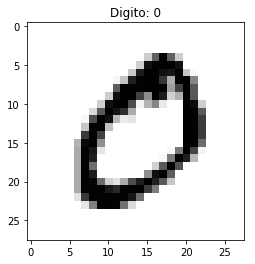

In [17]:
plt.imshow(first_image, cmap='gray_r')
plt.title('Digito: {}'.format(first_label))
plt.show()

Habiendo hecho el analisis descriptivo estamos listos para comenzar a construir los clasificadores.